In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kcHouse = pd.read_csv("kc_house_data.csv")
kcHouse

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
y = kcHouse["price"]
feat = kcHouse.copy(deep = True).drop("price", axis = 1)

In [4]:
feat

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
feat.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

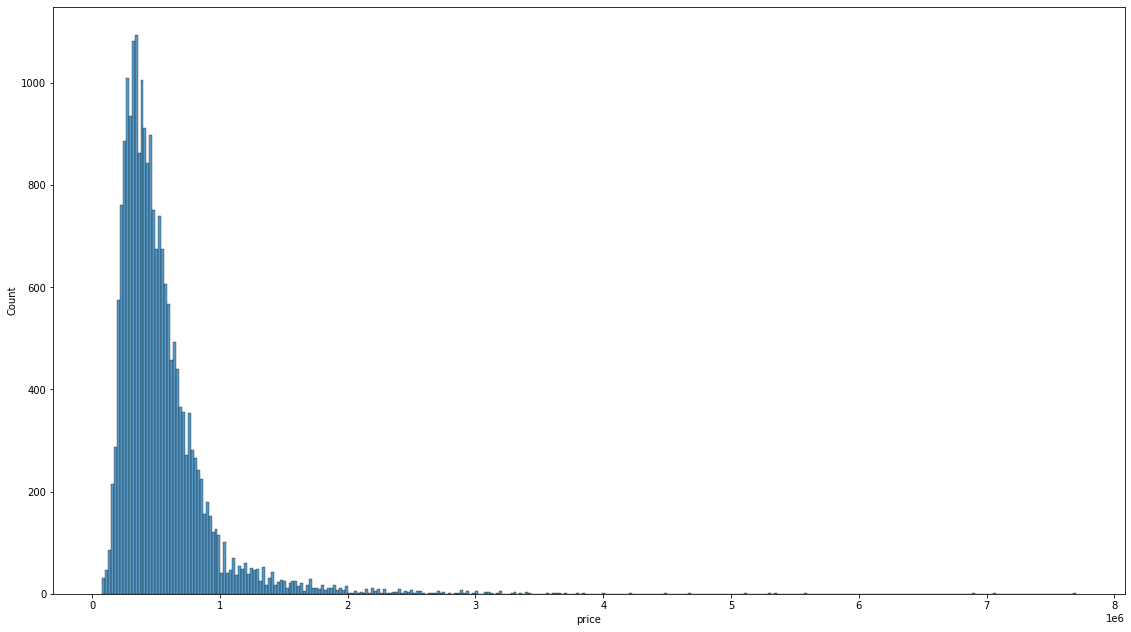

In [6]:
plt.figure(figsize = (19.2, 10.8))
sns.histplot(y)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dty

<Figure size 1382.4x777.6 with 0 Axes>

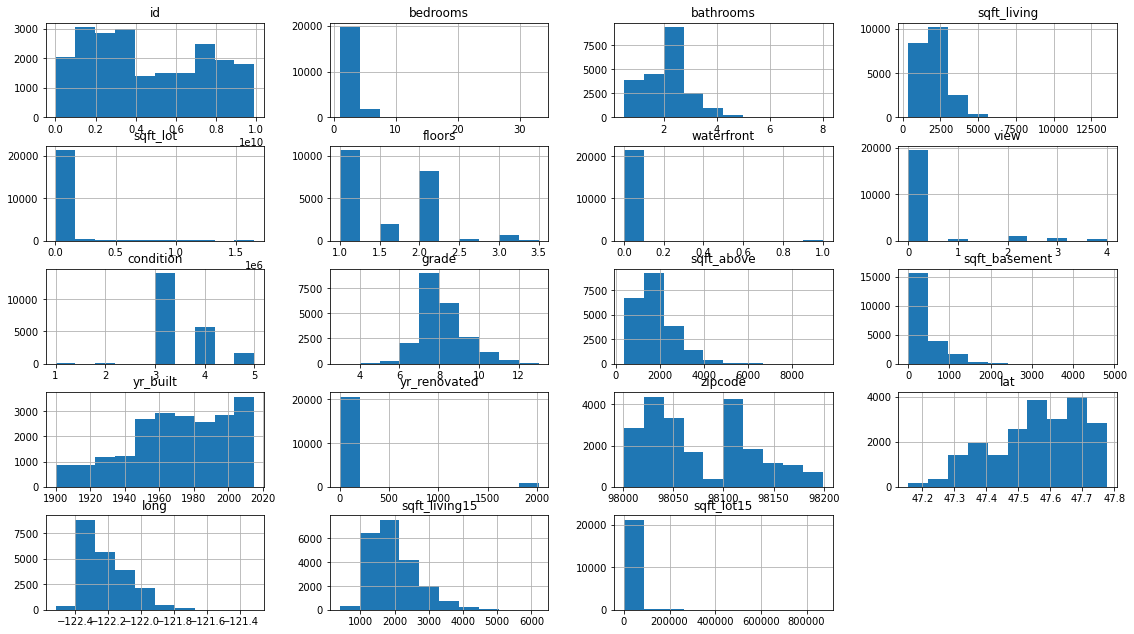

In [7]:
plt.figure(figsize = (19.2, 10.8))
feat.hist(figsize = (19.2, 10.8))

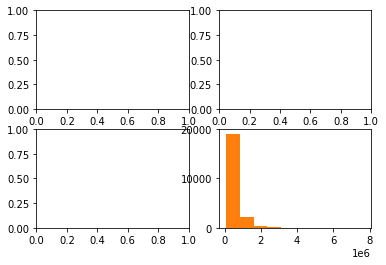

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
axes = plt.hist(y)
axes = plt.hist(y)


In [9]:
kcHouse.corr()["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:>

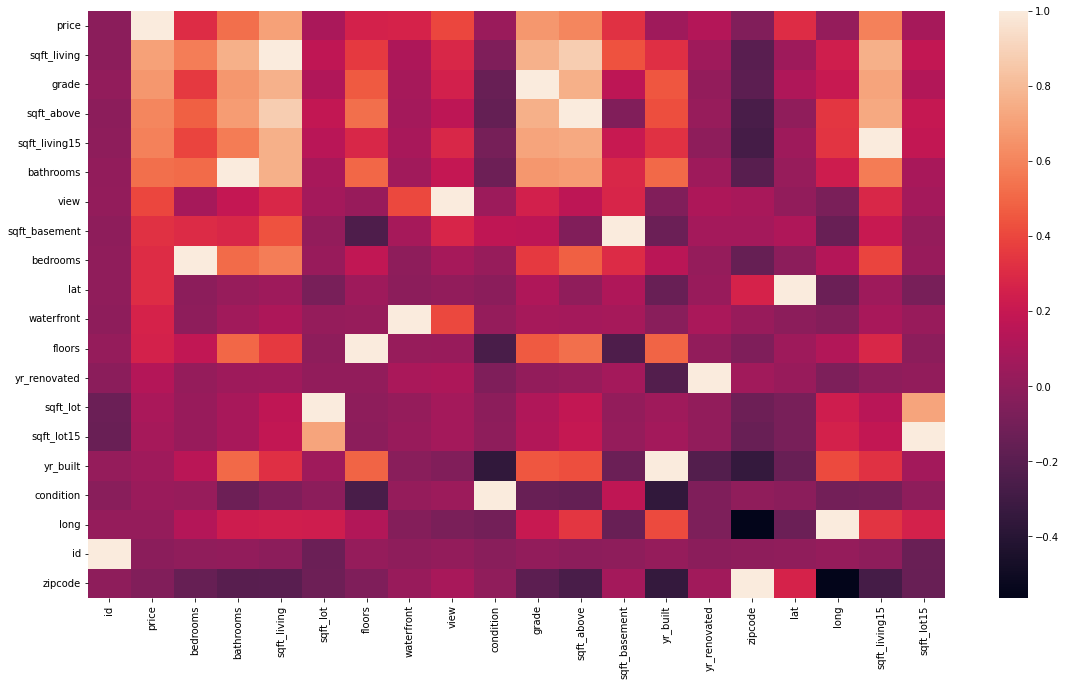

In [10]:
plt.figure(figsize = (19.2, 10.8))
sns.heatmap(kcHouse.corr().sort_values(by = "price", ascending = False))

In [11]:
#fig, axes = plt.subplots(nrows = 1, ncols = 5)
#axes[0][0] = plt.scatter(x = kcHouse["price"], y = kcHouse["sqft_living"])
#axes[1][0] = plt.scatter(x = kcHouse["price"], y = kcHouse["grade"])
#axes[0][2] = plt.scatter(x = kcHouse["price"], y = kcHouse["sqft_above"])
#axes[0][3] = plt.scatter(x = kcHouse["price"], y = kcHouse["sqft_living15"])
#axes[0][4] = plt.scatter(x = kcHouse["price"], y = kcHouse["bathrooms"])


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

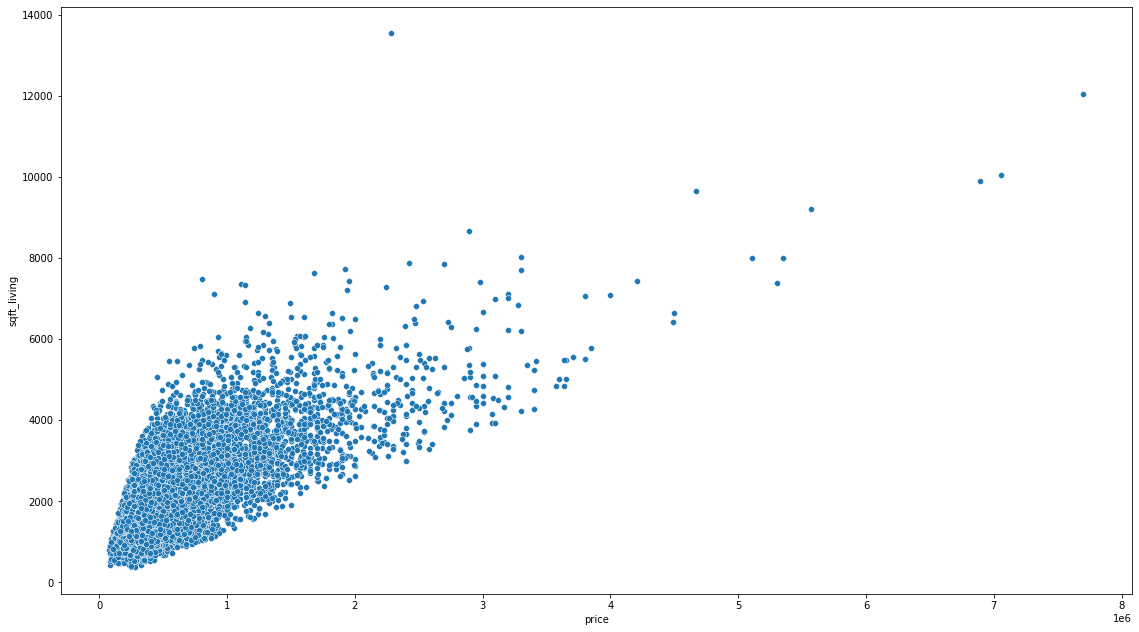

In [12]:
plt.figure(figsize = (19.2, 10.8))
sns.scatterplot(x = kcHouse["price"], y = kcHouse["sqft_living"])

<AxesSubplot:xlabel='long', ylabel='lat'>

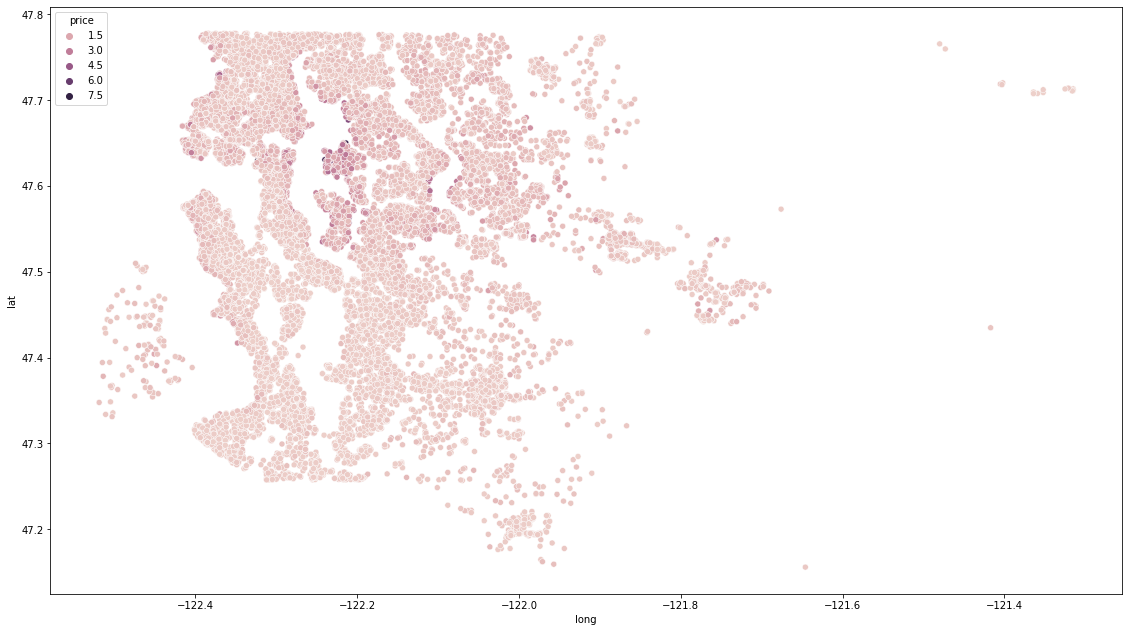

In [13]:
plt.figure(figsize = (19.2, 10.8))
sns.scatterplot(x = "long", y = "lat", data = kcHouse, hue = "price")

In [14]:
#not very clear due to outliers

In [15]:
len(kcHouse)

21597

In [16]:
#dropping top 1%

In [17]:
bottom99 = kcHouse.sort_values("price", ascending = False).reset_index(drop = True)[200:].reset_index(drop = True)
top1 = kcHouse.sort_values("price", ascending = False).reset_index(drop = True)[:200].reset_index(drop = True)

In [18]:
len(bottom99)

21397

<AxesSubplot:xlabel='long', ylabel='lat'>

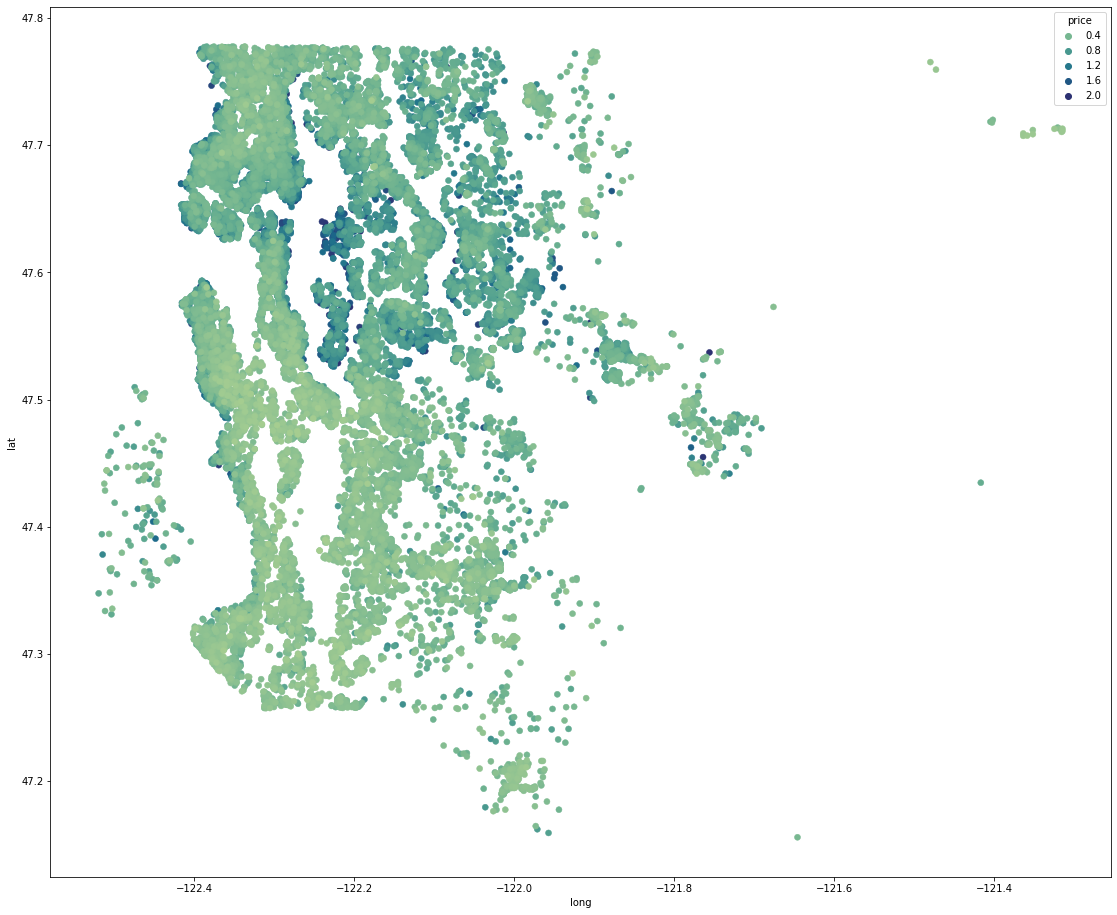

In [19]:
plt.figure(figsize = (19, 16))
sns.scatterplot(x = "long", y = "lat", data = bottom99, hue = "price",
                edgecolor = None,
                palette = "crest")

<AxesSubplot:xlabel='long', ylabel='lat'>

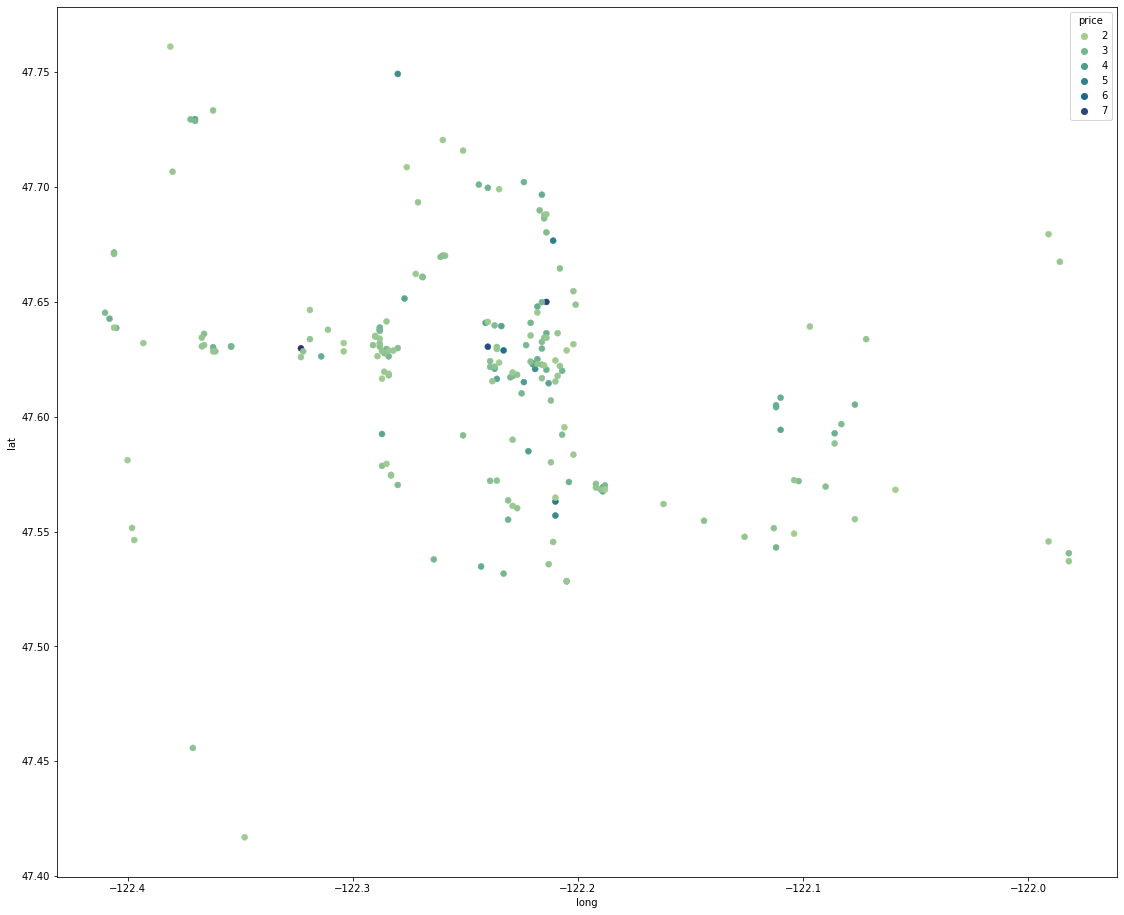

In [20]:
plt.figure(figsize = (19, 16))
sns.scatterplot(x = "long", y = "lat", data = top1, hue = "price",
                edgecolor = None,
                palette = "crest")

<AxesSubplot:xlabel='waterfront', ylabel='price'>

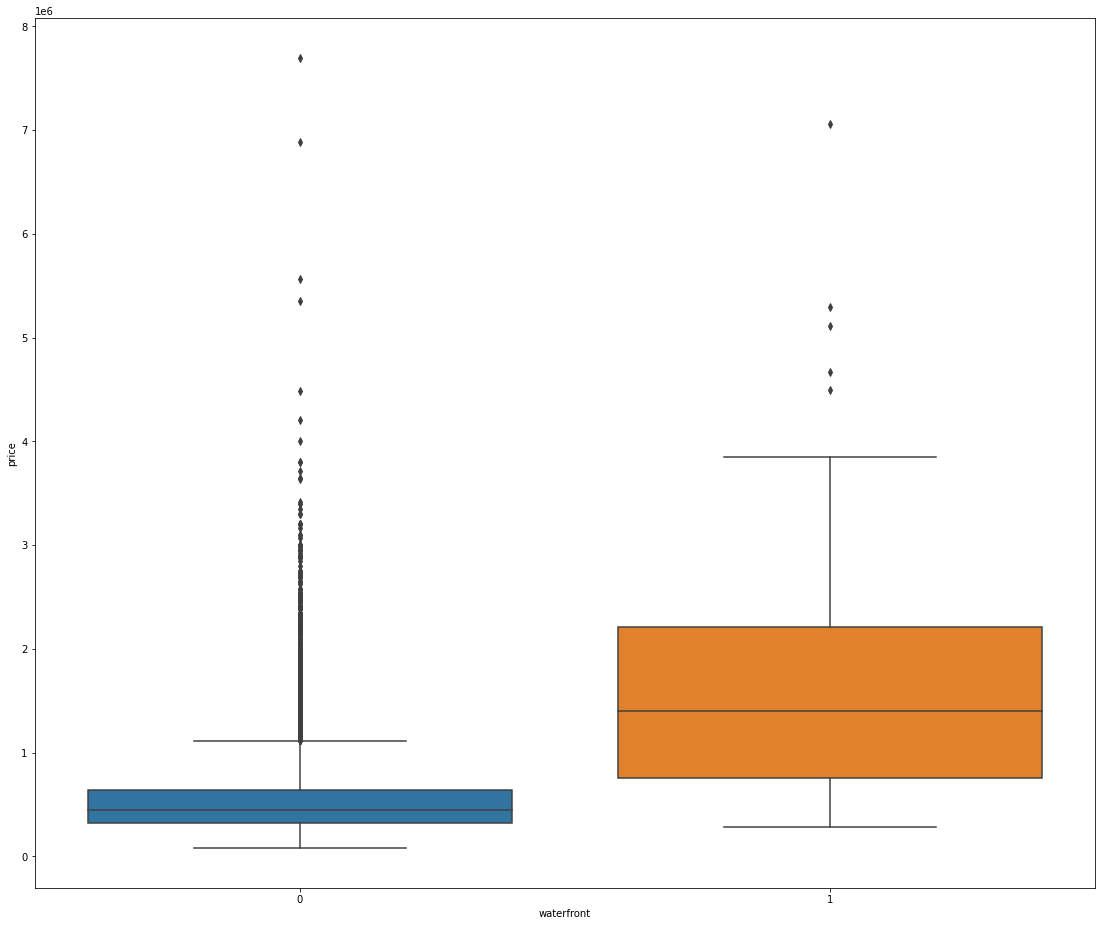

In [21]:
plt.figure(figsize = (19, 16))

sns.boxplot(data = kcHouse, x = "waterfront", y = "price")

In [22]:
kcHouse.drop("id", axis = 1, inplace = True)
bottom99.drop("id", axis = 1, inplace = True)

In [23]:
kcHouse["date"] = pd.to_datetime(kcHouse["date"])
bottom99["date"] = pd.to_datetime(bottom99["date"])

In [24]:
kcHouse["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
kcHouse["year"] = kcHouse["date"].apply(lambda date: date.year)
bottom99["year"] = bottom99["date"].apply(lambda date: date.year)
kcHouse["day"] = kcHouse["date"].apply(lambda date: date.day)
bottom99["month"] = bottom99["date"].apply(lambda date: date.month)
kcHouse["month"] = kcHouse["date"].apply(lambda date: date.month)
kcHouse

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,13,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,9,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,25,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,9,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,21,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,23,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,23,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,16,1


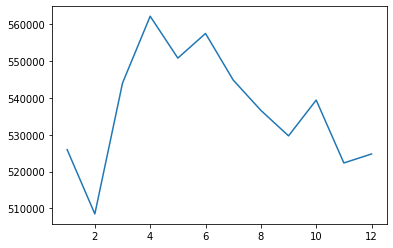

In [26]:
plt.plot(kcHouse.groupby("month").mean()["price"])

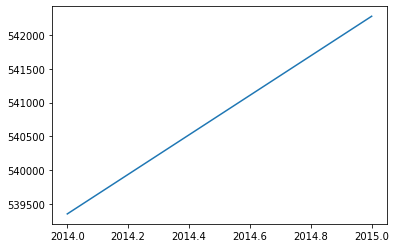

In [27]:
plt.plot(kcHouse.groupby("year").mean()["price"])

In [28]:
kcHouse["zipcode"].nunique()

70

In [29]:
kcHouse.drop("zipcode", axis = 1, inplace = True)
bottom99.drop("zipcode", axis = 1, inplace = True)

In [30]:
kcHouse["yr_renovated"].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [31]:
kcHouse.drop("date", axis = 1, inplace = True)
kcHouse.drop("day", axis = 1, inplace = True)
bottom99.drop("date", axis = 1, inplace = True)

In [32]:
from sklearn.model_selection import train_test_split

X = kcHouse.drop("price", axis = 1).values
y = kcHouse["price"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [33]:
from sklearn.preprocessing import MinMaxScaler


In [34]:
scaler = MinMaxScaler()

In [35]:
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2022-09-22 05:24:05.300684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 05:24:05.462216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 05:24:05.462239: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-22 05:24:05.493276: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-22 05:24:06.338117: W tensorflow/stream_executor/platform/de

In [37]:
XTrain.shape

(17277, 19)

In [38]:
model = Sequential()

model.add(Dense(19, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(4, activation = "relu"))

model.add(Dense(1, activation = "relu"))

model.compile(optimizer = "adam", loss = "mse")


2022-09-22 05:24:06.978165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-22 05:24:06.978208: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-22 05:24:06.978237: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ArdentNoir): /proc/driver/nvidia/version does not exist
2022-09-22 05:24:06.978596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
model.fit(x = XTrain, y = yTrain, epochs = 400, validation_data = (XTest, yTest), batch_size = 128)


Epoch 1/400
135/135 [==============================] - 1s 3ms/step - loss: 424190771200.0000 - val_loss: 437580169216.0000
Epoch 2/400
135/135 [==============================] - 0s 2ms/step - loss: 424136998912.0000 - val_loss: 437442478080.0000
Epoch 3/400
135/135 [==============================] - 0s 2ms/step - loss: 423802929152.0000 - val_loss: 436807892992.0000
Epoch 4/400
135/135 [==============================] - 0s 2ms/step - loss: 422673383424.0000 - val_loss: 435008307200.0000
Epoch 5/400
135/135 [==============================] - 0s 2ms/step - loss: 420029628416.0000 - val_loss: 431252504576.0000
Epoch 6/400
135/135 [==============================] - 0s 2ms/step - loss: 415032770560.0000 - val_loss: 424650047488.0000
Epoch 7/400
135/135 [==============================] - 0s 2ms/step - loss: 406808068096.0000 - val_loss: 414373871616.0000
Epoch 8/400
135/135 [==============================] - 0s 2ms/step - loss: 394620403712.0000 - val_loss: 399670411264.0000
Epoch 9/400
135/

In [40]:
modelHist = pd.DataFrame(model.history.history)
modelHist

,loss,val_loss
0,4.241908e+11,4.375802e+11
1,4.241370e+11,4.374425e+11
2,4.238029e+11,4.368079e+11
3,4.226734e+11,4.350083e+11
4,4.200296e+11,4.312525e+11
...,...,...
395,3.208580e+10,3.799294e+10
396,3.207981e+10,3.801746e+10
397,3.205166e+10,3.797691e+10
398,3.204041e+10,3.794954e+10


<AxesSubplot:>

<Figure size 1368x1152 with 0 Axes>

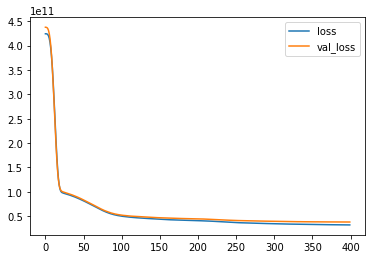

In [41]:
plt.figure(figsize = (19, 16))
modelHist.plot()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [43]:
predictions = model.predict(XTest)

135/135 [==============================] - 0s 1ms/step


In [44]:
mean_absolute_error(yTest, predictions)

116119.76059095595

In [45]:
np.sqrt(mean_squared_error(yTest, predictions))

194892.3946894211

In [46]:
explained_variance_score(yTest, predictions)

0.7247384970911203

Bottom 99%

In [47]:
bottom99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21397 non-null  float64
 1   bedrooms       21397 non-null  int64  
 2   bathrooms      21397 non-null  float64
 3   sqft_living    21397 non-null  int64  
 4   sqft_lot       21397 non-null  int64  
 5   floors         21397 non-null  float64
 6   waterfront     21397 non-null  int64  
 7   view           21397 non-null  int64  
 8   condition      21397 non-null  int64  
 9   grade          21397 non-null  int64  
 10  sqft_above     21397 non-null  int64  
 11  sqft_basement  21397 non-null  int64  
 12  yr_built       21397 non-null  int64  
 13  yr_renovated   21397 non-null  int64  
 14  lat            21397 non-null  float64
 15  long           21397 non-null  float64
 16  sqft_living15  21397 non-null  int64  
 17  sqft_lot15     21397 non-null  int64  
 18  year  

In [48]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [49]:

X99 = bottom99.drop("price", axis = 1).values
y99 = bottom99["price"]

XTrain99, XTest99, yTrain99, yTest99 = train_test_split(X, y, test_size = 0.2)

In [50]:
model99 = Sequential()

model99.add(Dense(19, activation = "relu"))
model99.add(Dense(19, activation = "relu"))
model99.add(Dense(19, activation = "relu"))
model99.add(Dense(19, activation = "relu"))

model99.add(Dense(1, activation = "relu"))

model99.compile(optimizer = "adam", loss = "mse")


In [51]:
model99.fit(x = XTrain99, y = yTrain99, epochs = 1000, validation_data = (XTest99, yTest99), batch_size = 128)


Epoch 1/1000
135/135 [==============================] - 1s 4ms/step - loss: 369565990912.0000 - val_loss: 265996173312.0000
Epoch 2/1000
135/135 [==============================] - 0s 2ms/step - loss: 177459363840.0000 - val_loss: 110602444800.0000
Epoch 3/1000
135/135 [==============================] - 0s 2ms/step - loss: 92587917312.0000 - val_loss: 82958639104.0000
Epoch 4/1000
135/135 [==============================] - 0s 2ms/step - loss: 84661854208.0000 - val_loss: 78115774464.0000
Epoch 5/1000
135/135 [==============================] - 0s 2ms/step - loss: 80500178944.0000 - val_loss: 74226106368.0000
Epoch 6/1000
135/135 [==============================] - 0s 2ms/step - loss: 76687958016.0000 - val_loss: 71127793664.0000
Epoch 7/1000
135/135 [==============================] - 0s 2ms/step - loss: 73552543744.0000 - val_loss: 67885035520.0000
Epoch 8/1000
135/135 [==============================] - 0s 2ms/step - loss: 70715383808.0000 - val_loss: 65974140928.0000
Epoch 9/1000
135/135

<AxesSubplot:>

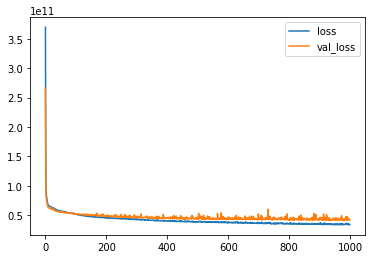

In [52]:
modelHist99 = pd.DataFrame(model99.history.history)
modelHist99.plot()

In [53]:
predictions99 = model99.predict(XTest99)

135/135 [==============================] - 0s 2ms/step


In [54]:
mean_absolute_error(yTest, predictions)

116119.76059095595

In [55]:
explained_variance_score(yTest99, predictions99)

0.6800207612284324